Timestamp: 1689857199, Latitude: 49.4283, Longitude: 145.9278
Timestamp: 1689857209, Latitude: 49.2214, Longitude: 146.8781
Timestamp: 1689857220, Latitude: 49.0059, Longitude: 147.8198
Timestamp: 1689857230, Latitude: 48.793, Longitude: 148.7086
Timestamp: 1689857240, Latitude: 48.5614, Longitude: 149.6333
Timestamp: 1689857251, Latitude: 48.3218, Longitude: 150.549
Timestamp: 1689857261, Latitude: 48.0742, Longitude: 151.4556
Timestamp: 1689857272, Latitude: 47.8189, Longitude: 152.3529
Timestamp: 1689857282, Latitude: 47.5559, Longitude: 153.2408
Timestamp: 1689857292, Latitude: 47.2986, Longitude: 154.0776
Timestamp: 1689857303, Latitude: 47.0077, Longitude: 154.9883
Timestamp: 1689857314, Latitude: 46.7228, Longitude: 155.8477
Timestamp: 1689857324, Latitude: 46.4308, Longitude: 156.6975
Timestamp: 1689857335, Latitude: 46.1319, Longitude: 157.5376
Timestamp: 1689857345, Latitude: 45.841, Longitude: 158.3288
Timestamp: 1689857355, Latitude: 45.529, Longitude: 159.15
Timestamp: 168

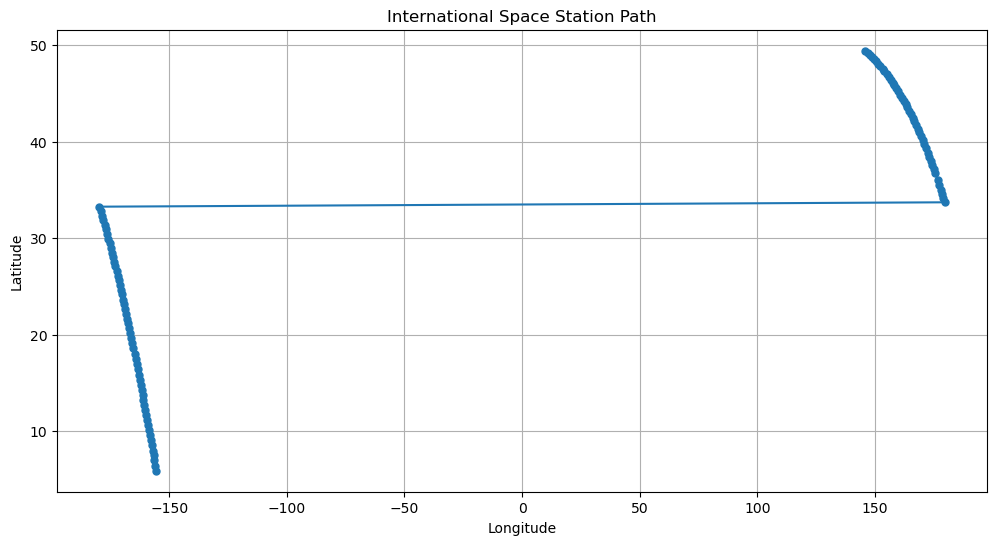

In [4]:
import time
import requests
import matplotlib.pyplot as plt

def get_iss_location():
    response = requests.get('http://api.open-notify.org/iss-now.json')
    if response.status_code == 200:
        data = response.json()
        timestamp = data['timestamp']
        latitude = float(data['iss_position']['latitude'])
        longitude = float(data['iss_position']['longitude'])
        return timestamp, latitude, longitude
    else:
        return None

def collect_iss_data(num_data_points):
    data_points = []
    for _ in range(num_data_points):
        iss_location = get_iss_location()
        if iss_location:
            data_points.append(iss_location)
        time.sleep(10)  
    return data_points

def plot_iss_path(data_points):
    timestamps = [data[0] for data in data_points]
    latitudes = [data[1] for data in data_points]
    longitudes = [data[2] for data in data_points]

    plt.figure(figsize=(12, 6))
    plt.plot(longitudes, latitudes, marker='o', linestyle='-', markersize=5)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('International Space Station Path')
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    num_data_points = 100
    data_points = collect_iss_data(num_data_points)

    
    for timestamp, latitude, longitude in data_points:
        print(f"Timestamp: {timestamp}, Latitude: {latitude}, Longitude: {longitude}")

    
    plot_iss_path(data_points)
